In [28]:
import pandas as pd

In [29]:
df = pd.read_excel(r"C:\Users\rozas\Documents\Projects\ML_projects\archives\Real estate valuation data set.xlsx")

In [30]:
# Analisando os dados
df.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.916667,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.916667,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583333,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500000,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833333,5.0,390.56840,5,24.97937,121.54245,43.1


In [31]:
# Tamanho do dataframe
df.shape

(414, 8)

In [32]:
# informacoes sobre as colunas da base de dados
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   No                                      414 non-null    int64  
 1   X1 transaction date                     414 non-null    float64
 2   X2 house age                            414 non-null    float64
 3   X3 distance to the nearest MRT station  414 non-null    float64
 4   X4 number of convenience stores         414 non-null    int64  
 5   X5 latitude                             414 non-null    float64
 6   X6 longitude                            414 non-null    float64
 7   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB


In [33]:
# Renomeando colunas
def renomear_colunas(df):
    novos_nomes = {
        'No': 'id',
        'X1 transaction date': 'Data_transação_X1',
        'X2 house age': 'Idade_casa_X2',
        'X3 distance to the nearest MRT station': 'Distância_X3_estação_MRT',
        'X4 number of convenience stores': 'Número_X4_lojas',
        'X5 latitude': 'X5_latitude',
        'X6 longitude': 'X6_longitude',
        'Y house price of unit area': 'Preço_casa_Y_area_unitária'
    }
    df.rename(columns=novos_nomes, inplace=True)

In [34]:
renomear_colunas(df)

In [35]:
df.head()

,id,Data_transação_X1,Idade_casa_X2,Distância_X3_estação_MRT,Número_X4_lojas,X5_latitude,X6_longitude,Preço_casa_Y_area_unitária
0,1,2012.916667,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.916667,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583333,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500000,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833333,5.0,390.56840,5,24.97937,121.54245,43.1


# Alguns testes estatísticos

### Teste de Normalidade

In [36]:
# Teste de Normalidade
from scipy.stats import shapiro # -> Verifica se a distribuiçao e semelhante a uma distribuicao normal

stat, p_value = shapiro(df['Preço_casa_Y_area_unitária'])

print(p_value)

5.413612598204054e-07


Teste de Normalidade (Shapiro-Wilk):

p-valor: 5.413612598204054e-07
Interpretação: O p-valor é extremamente baixo, indicando que os dados não seguem uma distribuição normal.

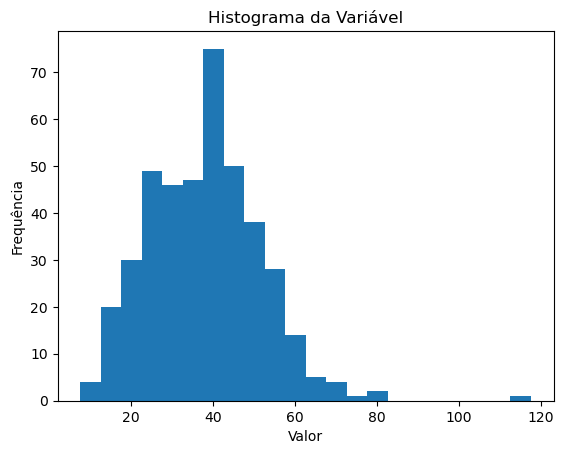

In [37]:
import matplotlib.pyplot as plt

plt.hist(df['Preço_casa_Y_area_unitária'], bins='auto')
plt.title('Histograma da Variável')
plt.xlabel('Valor')
plt.ylabel('Frequência')
plt.show()


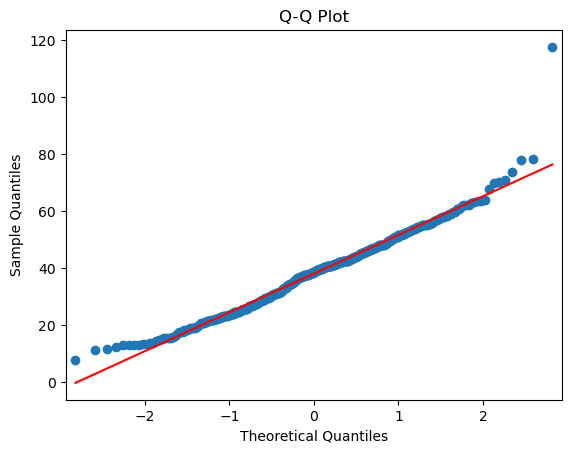

In [38]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

sm.qqplot(df['Preço_casa_Y_area_unitária'], line='s')
plt.title('Q-Q Plot')
plt.show()


In [39]:
from scipy.stats import kstest

# Especificar a distribuição teórica (exemplo: 'norm' para normal)
distribution = 'norm'

stat, p_value = kstest(df['Preço_casa_Y_area_unitária'], distribution)
print(f'Teste de Kolmogorov-Smirnov - p-value: {p_value}')


Teste de Kolmogorov-Smirnov - p-value: 0.0


Teste de Kolmogorov-Smirnov:

p-valor: 0.0
Interpretação: O p-valor é baixo, sugerindo que os dados não seguem uma distribuição normal. Isso é consistente com o resultado do teste de Shapiro-Wilk.

In [40]:
from scipy.stats import anderson

result = anderson(df['Preço_casa_Y_area_unitária'])
print(f'Anderson-Darling Test - Estatística do teste: {result.statistic}, Valores críticos: {result.critical_values}')


Anderson-Darling Test - Estatística do teste: 0.8123622737302867, Valores críticos: [0.571 0.65  0.78  0.909 1.082]


Teste de Anderson-Darling:

Estatística do teste: 0.8123622737302867
Valores críticos: [0.571, 0.65, 0.78, 0.909, 1.082]
Interpretação: A estatística do teste é menor do que os valores críticos, indicando que os dados não seguem uma distribuição normal.

In [41]:
# Teste de Homogeneidade de Variância (Levene):
from scipy.stats import levene

# Exemplo com a variável 'Y house price of unit area' em diferentes grupos (pode criar grupos com base em outra variável)
group1 = df['Preço_casa_Y_area_unitária'].loc[df['Número_X4_lojas'] == 5]
group2 = df['Preço_casa_Y_area_unitária'].loc[df['Número_X4_lojas'] == 9]

stat, p_value = levene(group1, group2)
print(f'Levene Test - p-value: {p_value}')


Levene Test - p-value: 0.09901102483282327


Teste de Homogeneidade de Variância (Levene):

p-valor: 0.09901102483282327
Interpretação: O p-valor é maior que 0,05, o que sugere que não há evidências suficientes para rejeitar a hipótese nula de homogeneidade de variância.

In [42]:
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

# Exemplo usando a variável 'Y house price of unit area' em relação à variável categórica 'X4 number of convenience stores'
formula = 'Q("Preço_casa_Y_area_unitária") ~ C(Q("Número_X4_lojas"))'
model = ols(formula, data=df).fit()
anova_table = anova_lm(model, typ=2)

print('ANOVA Table:')
print(anova_table)


ANOVA Table:
                               sum_sq     df          F        PR(>F)
C(Q("Número_X4_lojas"))  29215.783307   10.0  24.920759  1.178107e-36
Residual                 47245.594277  403.0        NaN           NaN


Análise de Variância (ANOVA):

p-valor: 1.178107e-36
Interpretação: O p-valor é muito baixo, indicando que há diferenças significativas entre os grupos. Neste contexto, isso sugere que há uma diferença significativa nas médias dos grupos.

In [43]:
correlation_matrix = df.corr()
corr_y = correlation_matrix['Preço_casa_Y_area_unitária']

print('Correlation with Y house price of unit area:')
print(corr_y)


Correlation with Y house price of unit area:
id                           -0.028587
Data_transação_X1             0.087529
Idade_casa_X2                -0.210567
Distância_X3_estação_MRT     -0.673613
Número_X4_lojas               0.571005
X5_latitude                   0.546307
X6_longitude                  0.523287
Preço_casa_Y_area_unitária    1.000000
Name: Preço_casa_Y_area_unitária, dtype: float64


Correlação:

Correlação com 'Preço_casa_Y_area_unitária':


id: -0.028587


Data_transação_X1: 0.087529


Idade_casa_X2: -0.210567


Distância_X3_estação_MRT: -0.673613


Número_X4_lojas: 0.571005


X5_latitude: 0.546307


X6_longitude: 0.523287


Interpretação: As correlações indicam a força e a direção da relação linear entre as variáveis. Por exemplo, 'Distância_X3_estação_MRT' tem uma correlação negativa forte com 'Preço_casa_Y_area_unitária', indicando que à medida que a distância à estação MRT aumenta, o preço da casa tende a diminuir.

# Aplicando modelo de regressao linear

In [44]:
# Importando bibliotecas
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

import matplotlib.pyplot as plt

In [45]:
# Separando features (X) e target (Y)
X = df.drop(['id', 'Preço_casa_Y_area_unitária'], axis=1)
y = df['Preço_casa_Y_area_unitária']

In [46]:
# Dividindo os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [47]:
# Criando e treinando o modelo de regressao linear
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [48]:
# Fazendo previsoes no conjunto de teste
y_pred = model.predict(X_test)

In [49]:
# Avaliando o desempenho do modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [50]:
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 53.50225236117672
R-squared: 0.6810781244679431


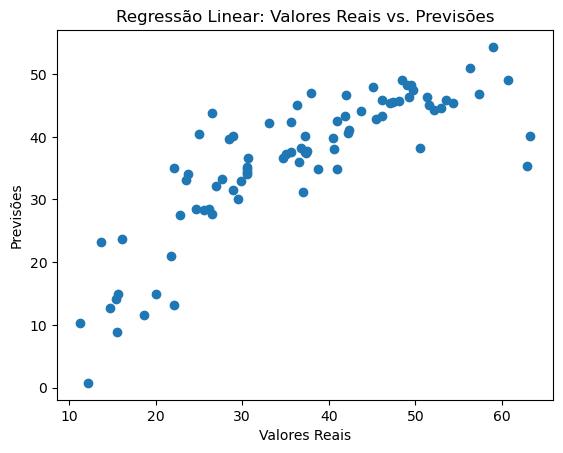

In [51]:
# Visualizando as previsões em relação aos valores reais
plt.scatter(y_test, y_pred)
plt.xlabel('Valores Reais')
plt.ylabel('Previsões')
plt.title('Regressão Linear: Valores Reais vs. Previsões')
plt.show()

### Visualizando residuos

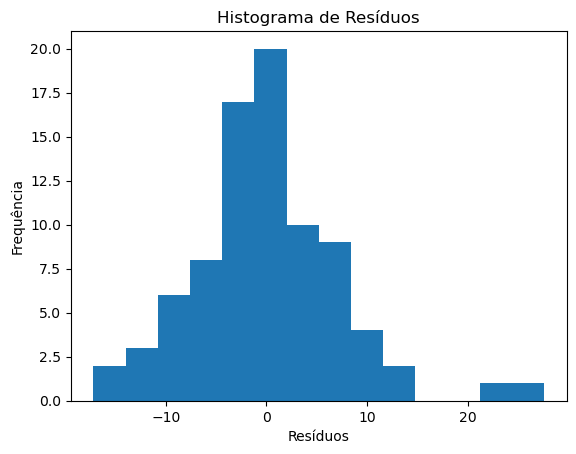

In [52]:
residuals = y_test - y_pred
plt.hist(residuals, bins='auto')
plt.title('Histograma de Resíduos')
plt.xlabel('Resíduos')
plt.ylabel('Frequência')
plt.show()

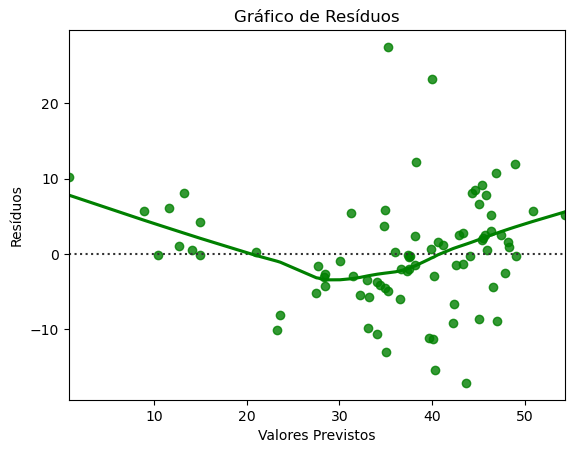

In [53]:
import seaborn as sns

# Criando um DataFrame com as previsões e os valores reais
residuals_df = pd.DataFrame({'Residuals': y_test - y_pred, 'Predictions': y_pred, 'Actual': y_test})

# Plotando o gráfico de resíduos
sns.residplot(x='Predictions', y='Residuals', data=residuals_df, lowess=True, color='g')
plt.title('Gráfico de Resíduos')
plt.xlabel('Valores Previstos')
plt.ylabel('Resíduos')
plt.show()

### Visualização da Linha de Regressão:


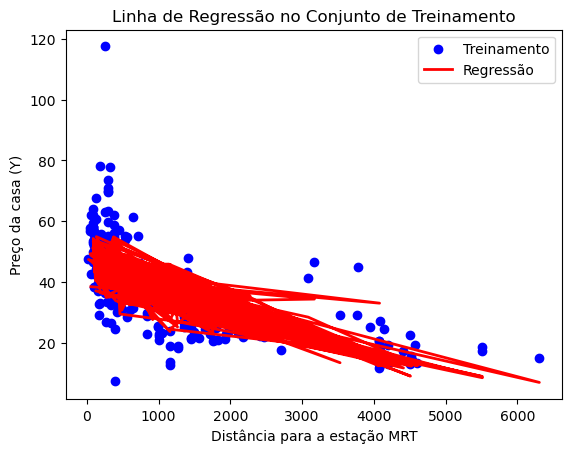

In [54]:
plt.scatter(X_train['Distância_X3_estação_MRT'], y_train, color='blue', label='Treinamento')
plt.plot(X_train['Distância_X3_estação_MRT'], model.predict(X_train), color='red', linewidth=2, label='Regressão')
plt.xlabel('Distância para a estação MRT')
plt.ylabel('Preço da casa (Y)')
plt.legend()
plt.title('Linha de Regressão no Conjunto de Treinamento')
plt.show()


### Visualização da Importância das Características:


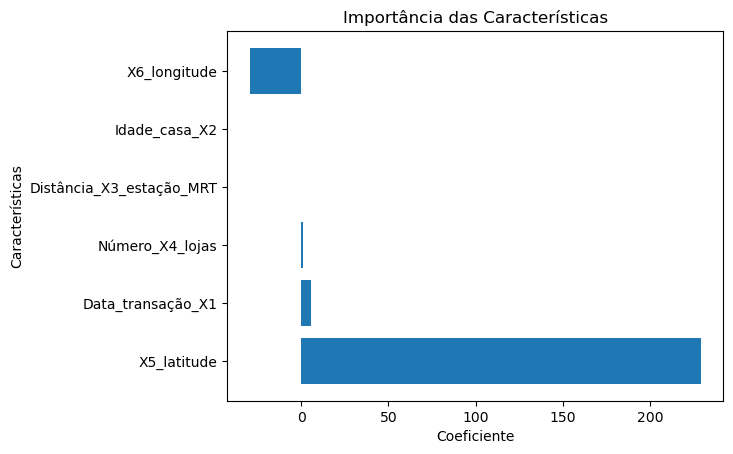

In [55]:
coef_df = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_})
coef_df.sort_values(by='Coefficient', ascending=False, inplace=True)

plt.barh(coef_df['Feature'], coef_df['Coefficient'])
plt.xlabel('Coeficiente')
plt.ylabel('Características')
plt.title('Importância das Características')
plt.show()


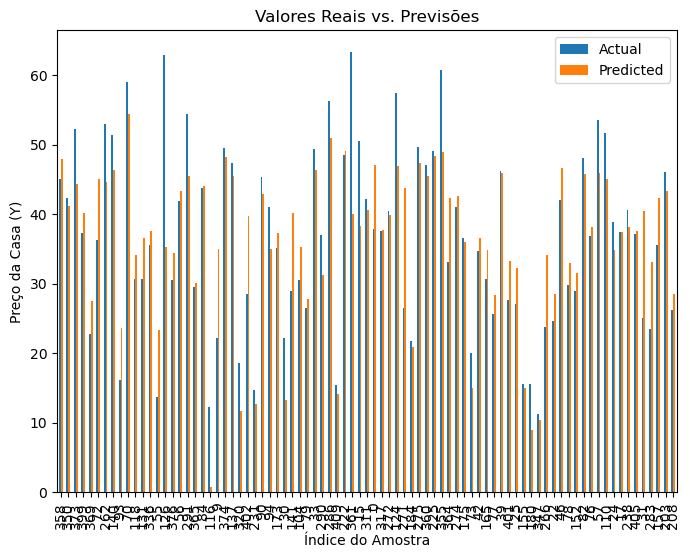

In [56]:
# Criando um DataFrame com os valores reais e previstos
results_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

# Plotando um gráfico de barras
results_df.plot(kind='bar', figsize=(8, 6))
plt.title('Valores Reais vs. Previsões')
plt.xlabel('Índice do Amostra')
plt.ylabel('Preço da Casa (Y)')
plt.show()
